#Twitter Sentiment Analysis of Covid-19 Nationwide Effect in India#

In [3]:
import tweepy as tw
import numpy as np
import pandas as pd
import re 
from textblob import TextBlob
from tweepy import OAuthHandler
import warnings
import neattext.functions as nfx
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
#Add your keys 
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [5]:
auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [6]:
api = tw.API(auth,wait_on_rate_limit=True)

In [ ]:
hashtag = '#IndiaFightsCorona'
tweets = tw.Cursor(api.search, q=hashtag,lang='en').items(5000)
tweet_data = [[tweet.geo,tweet.text,tweet.user.screen_name,tweet.user.location,
               tweet.created_at,tweet.entities['hashtags']]for tweet in tweets]

In [ ]:
def hash_tag(tdata):
    tags = ''
    for i in range(len(tdata)):
        tags = tags + str(tdata[i]['text']) + ','
    tags = tags.strip(',')
    return tags   

In [ ]:
tweet_df = pd.DataFrame(data=tweet_data,columns=['geo','text','user_name','loc','date','tags'])
pd.set_option('max_colwidth',800)

In [ ]:

tweet_df.to_csv('tweet.csv', index=False)

In [ ]:
tweet_df.head(50)


,geo,text,user_name,loc,date,tags
0,None,"RT @COVIDNewsByMIB: #IndiaFightsCorona:\n\n📍𝑴𝒐𝒓𝒆 𝒕𝒉𝒂𝒏 59 𝒍𝒂𝒌𝒉 (59,08,440) 𝒗𝒂𝒄𝒄𝒊𝒏𝒆 𝒅𝒐𝒔𝒆𝒔 𝒂𝒅𝒎𝒊𝒏𝒊𝒔𝒕𝒆𝒓𝒆𝒅 𝒊𝒏 𝒕𝒉𝒆 𝒍𝒂𝒔𝒕 24 𝒉𝒐𝒖𝒓𝒔.\n\n➡️Together we can…",airnews_mumbai,"Mumbai, India",2021-11-09 17:14:52,"[{'text': 'IndiaFightsCorona', 'indices': [20, 38]}]"
1,None,"RT @COVIDNewsByMIB: #IndiaFightsCorona:\n\n#COVID19Vaccination Status (As on 9th November 2021, 8:00 AM)\n\n✅Total vaccine doses administered (…",airnews_mumbai,"Mumbai, India",2021-11-09 17:13:59,"[{'text': 'IndiaFightsCorona', 'indices': [20, 38]}, {'text': 'COVID19Vaccination', 'indices': [41, 60]}]"
2,None,#COVID19 vaccination update - Day 298\n\n✅ India's cumulative vaccination coverage crosses 109.59 crore\n\n✅ More than… https://t.co/VQ7gzichEW,PIB_Guwahati,"Guwahati, India",2021-11-09 17:01:21,"[{'text': 'COVID19', 'indices': [0, 8]}]"
3,None,#COVID19 vaccination update - Day 298\n\n✅ India's cumulative vaccination coverage crosses 109.59 crore\n\n✅ More than… https://t.co/OCEtYfxdVb,PIBShillong,"शिलाँग, भारत",2021-11-09 17:01:13,"[{'text': 'COVID19', 'indices': [0, 8]}]"
4,None,"RT @FBhawanipatna: #IndiaFightsCorona #We4Vaccine Keeping in view the Dipavali festival,COVID-19 awareness through miking is going on at NA…",OdishaFob,,2021-11-09 16:45:20,"[{'text': 'IndiaFightsCorona', 'indices': [19, 37]}, {'text': 'We4Vaccine', 'indices': [38, 49]}]"
5,None,RT @COVIDNewsByMIB: #IndiaFightsCorona:\n\n➡️India’s cumulative vaccination coverage crosses 109.59 crore.\n\n➡️More than 48 lakh Vaccine doses…,AJAY65288,"Indore, India",2021-11-09 16:43:44,"[{'text': 'IndiaFightsCorona', 'indices': [20, 38]}]"
6,None,"#TNI Evening #News Headlines – November 9, 2021.\n\n#NEWSUPDATE #NewsAlert #IndiaFightsCorona #TheNewsInsight… https://t.co/IwfdFEyZk5",TNITweet,Bhubaneswar. New Delhi.,2021-11-09 16:38:50,"[{'text': 'TNI', 'indices': [0, 4]}, {'text': 'News', 'indices': [13, 18]}, {'text': 'NEWSUPDATE', 'indices': [50, 61]}, {'text': 'NewsAlert', 'indices': [62, 72]}, {'text': 'IndiaFightsCorona', 'indices': [73, 91]}, {'text': 'TheNewsInsight', 'indices': [92, 107]}]"
7,None,"RT @PIB_India: #COVID19 Updates\n\n▪️10,126 new cases in the last 24 hours; lowest in 266 days\n\n▪️11,982 recoveries in the last 24 hours\n\n▪️D…",ImSidhuRSS,India,2021-11-09 16:34:20,"[{'text': 'COVID19', 'indices': [15, 23]}]"
8,None,RT @ShelarAshish: We all are fighting against pandemic and trying to help each other for better Tomorrow! As our responsibility we are also…,Rahulsh06934853,"Maharashtra, India",2021-11-09 16:34:19,[]
9,None,"RT @joyb37: My efforts &amp; initiatives to secure the #Peoples #lives #peace with caring #Unity #humanity #love in each #CivilSociety, Mankind…",joyb37,"Kolkata, India",2021-11-09 16:32:02,"[{'text': 'Peoples', 'indices': [55, 63]}, {'text': 'lives', 'indices': [64, 70]}, {'text': 'peace', 'indices': [71, 77]}, {'text': 'Unity', 'indices': [90, 96]}, {'text': 'humanity', 'indices': [97, 106]}, {'text': 'love', 'indices': [107, 112]}, {'text': 'CivilSociety', 'indices': [121, 134]}]"


In [ ]:
for i in range(len(tweet_df['tags'])):
    tweet_df['tags'][i] = hash_tag(tweet_df['tags'][i])

# Cleaning Data

In [ ]:
re.sub("RT @[\w]*:", "" , tweet_df.text[0])
def clean_data(tweet):
    tweet = re.sub("RT @[\w]*:", "", tweet)
    tweet = re.sub("@[\w]*", "", tweet)
    tweet = re.sub("https://[A-Za-z0-9./]", "", tweet)
    tweet = re.sub("\n", "", tweet)
    tweet = re.sub("&amp", "", tweet)
    tweet = re.sub("#", "", tweet)
    tweet = re.sub(r"[^\w]", ' ', tweet )
    return tweet

In [ ]:
tweet_df['text']=tweet_df['text'].apply(lambda x:clean_data(x))


In [ ]:
tweet_df.to_csv('test_new.csv')

# Text Analysis of Tweets

In [ ]:
tweet_df['text'].iloc[2]

'COVID19 vaccination update   Day 298  India s cumulative vaccination coverage crosses 109 59 crore  More than   co VQ7gzichEW'

In [ ]:
tweet_df['extracted_hashtags'] = tweet_df['text'].apply(nfx.extract_hashtags)

In [ ]:
# Cleaning Text
tweet_df['clean_tweet'] = tweet_df['text'].apply(nfx.remove_hashtags)

In [ ]:
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [ ]:
tweet_df['clean_tweet'].iloc[10]

'    Agreed but is it not your PoliticalParty responsibility to give the priority  impo '

In [ ]:
# Cleaning Text: Multiple WhiteSpaces
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [ ]:
tweet_df['clean_tweet'].iloc[10]

' Agreed but is it not your PoliticalParty responsibility to give the priority impo '

In [ ]:
# Cleaning Text : Remove urls
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(nfx.remove_urls)

In [ ]:

# Cleaning Text: Punctuations
tweet_df['clean_tweet'] = tweet_df['clean_tweet'].apply(nfx.remove_puncts)

In [ ]:

tweet_df[['text','clean_tweet']].head()

,text,clean_tweet
0,IndiaFightsCorona 𝑴𝒐𝒓𝒆 𝒕𝒉𝒂𝒏 59 𝒍𝒂𝒌𝒉 59 08 440 𝒗𝒂𝒄𝒄𝒊𝒏𝒆 𝒅𝒐𝒔𝒆𝒔 𝒂𝒅𝒎𝒊𝒏𝒊𝒔𝒕𝒆𝒓𝒆𝒅 𝒊𝒏 𝒕𝒉𝒆 𝒍𝒂𝒔𝒕 24 𝒉𝒐𝒖𝒓𝒔 Together we can,IndiaFightsCorona 𝑴𝒐𝒓𝒆 𝒕𝒉𝒂𝒏 59 𝒍𝒂𝒌𝒉 59 08 440 𝒗𝒂𝒄𝒄𝒊𝒏𝒆 𝒅𝒐𝒔𝒆𝒔 𝒂𝒅𝒎𝒊𝒏𝒊𝒔𝒕𝒆𝒓𝒆𝒅 𝒊𝒏 𝒕𝒉𝒆 𝒍𝒂𝒔𝒕 24 𝒉𝒐𝒖𝒓𝒔 Together we can
1,IndiaFightsCorona COVID19Vaccination Status As on 9th November 2021 8 00 AM Total vaccine doses administered,IndiaFightsCorona COVID19Vaccination Status As on 9th November 2021 8 00 AM Total vaccine doses administered
2,COVID19 vaccination update Day 298 India s cumulative vaccination coverage crosses 109 59 crore More than co VQ7gzichEW,COVID19 vaccination update Day 298 India s cumulative vaccination coverage crosses 109 59 crore More than co VQ7gzichEW
3,COVID19 vaccination update Day 298 India s cumulative vaccination coverage crosses 109 59 crore More than co OCEtYfxdVb,COVID19 vaccination update Day 298 India s cumulative vaccination coverage crosses 109 59 crore More than co OCEtYfxdVb
4,IndiaFightsCorona We4Vaccine Keeping in view the Dipavali festival COVID 19 awareness through miking is going on at NA,IndiaFightsCorona We4Vaccine Keeping in view the Dipavali festival COVID 19 awareness through miking is going on at NA


# Sentiment Analysis

In [ ]:
from textblob import TextBlob

In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [ ]:
# Text
ex1 = tweet_df['clean_tweet'].iloc[0]

In [ ]:
get_sentiment(ex1)

{'polarity': 0.0, 'sentiment': 'Neutral', 'subjectivity': 0.0}

In [ ]:
tweet_df['sentiment_results'] = tweet_df['clean_tweet'].apply(get_sentiment)

In [ ]:
tweet_df = tweet_df.join(pd.json_normalize(tweet_df['sentiment_results']))

In [ ]:
tweet_df.head()

,geo,text,user_name,loc,date,tags,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,None,IndiaFightsCorona 𝑴𝒐𝒓𝒆 𝒕𝒉𝒂𝒏 59 𝒍𝒂𝒌𝒉 59 08 440 𝒗𝒂𝒄𝒄𝒊𝒏𝒆 𝒅𝒐𝒔𝒆𝒔 𝒂𝒅𝒎𝒊𝒏𝒊𝒔𝒕𝒆𝒓𝒆𝒅 𝒊𝒏 𝒕𝒉𝒆 𝒍𝒂𝒔𝒕 24 𝒉𝒐𝒖𝒓𝒔 Together we can,airnews_mumbai,"Mumbai, India",2021-11-09 17:14:52,IndiaFightsCorona,[],IndiaFightsCorona 𝑴𝒐𝒓𝒆 𝒕𝒉𝒂𝒏 59 𝒍𝒂𝒌𝒉 59 08 440 𝒗𝒂𝒄𝒄𝒊𝒏𝒆 𝒅𝒐𝒔𝒆𝒔 𝒂𝒅𝒎𝒊𝒏𝒊𝒔𝒕𝒆𝒓𝒆𝒅 𝒊𝒏 𝒕𝒉𝒆 𝒍𝒂𝒔𝒕 24 𝒉𝒐𝒖𝒓𝒔 Together we can,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}",0.0,0.00,Neutral
1,None,IndiaFightsCorona COVID19Vaccination Status As on 9th November 2021 8 00 AM Total vaccine doses administered,airnews_mumbai,"Mumbai, India",2021-11-09 17:13:59,"IndiaFightsCorona,COVID19Vaccination",[],IndiaFightsCorona COVID19Vaccination Status As on 9th November 2021 8 00 AM Total vaccine doses administered,"{'polarity': 0.0, 'subjectivity': 0.75, 'sentiment': 'Neutral'}",0.0,0.75,Neutral
2,None,COVID19 vaccination update Day 298 India s cumulative vaccination coverage crosses 109 59 crore More than co VQ7gzichEW,PIB_Guwahati,"Guwahati, India",2021-11-09 17:01:21,COVID19,[],COVID19 vaccination update Day 298 India s cumulative vaccination coverage crosses 109 59 crore More than co VQ7gzichEW,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentiment': 'Positive'}",0.5,0.50,Positive
3,None,COVID19 vaccination update Day 298 India s cumulative vaccination coverage crosses 109 59 crore More than co OCEtYfxdVb,PIBShillong,"शिलाँग, भारत",2021-11-09 17:01:13,COVID19,[],COVID19 vaccination update Day 298 India s cumulative vaccination coverage crosses 109 59 crore More than co OCEtYfxdVb,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentiment': 'Positive'}",0.5,0.50,Positive
4,None,IndiaFightsCorona We4Vaccine Keeping in view the Dipavali festival COVID 19 awareness through miking is going on at NA,OdishaFob,,2021-11-09 16:45:20,"IndiaFightsCorona,We4Vaccine",[],IndiaFightsCorona We4Vaccine Keeping in view the Dipavali festival COVID 19 awareness through miking is going on at NA,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}",0.0,0.00,Neutral


In [ ]:
tweet_df['sentiment'].value_counts()

Neutral     2914
Positive    1875
Negative     211
Name: sentiment, dtype: int64

# Visualization of Result


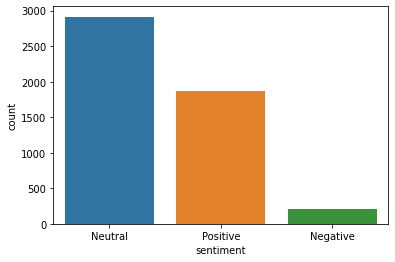

In [ ]:
# Plot with seaborn

sns.countplot(tweet_df['sentiment'])

In [ ]:
positive_tweet = tweet_df[tweet_df['sentiment'] == 'Positive']['clean_tweet']

In [ ]:
neutral_tweet = tweet_df[tweet_df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = tweet_df[tweet_df['sentiment'] == 'Negative']['clean_tweet']

In [ ]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [ ]:
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [ ]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]

In [ ]:
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [ ]:
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [ ]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [ ]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])

# Frequently used Negative words

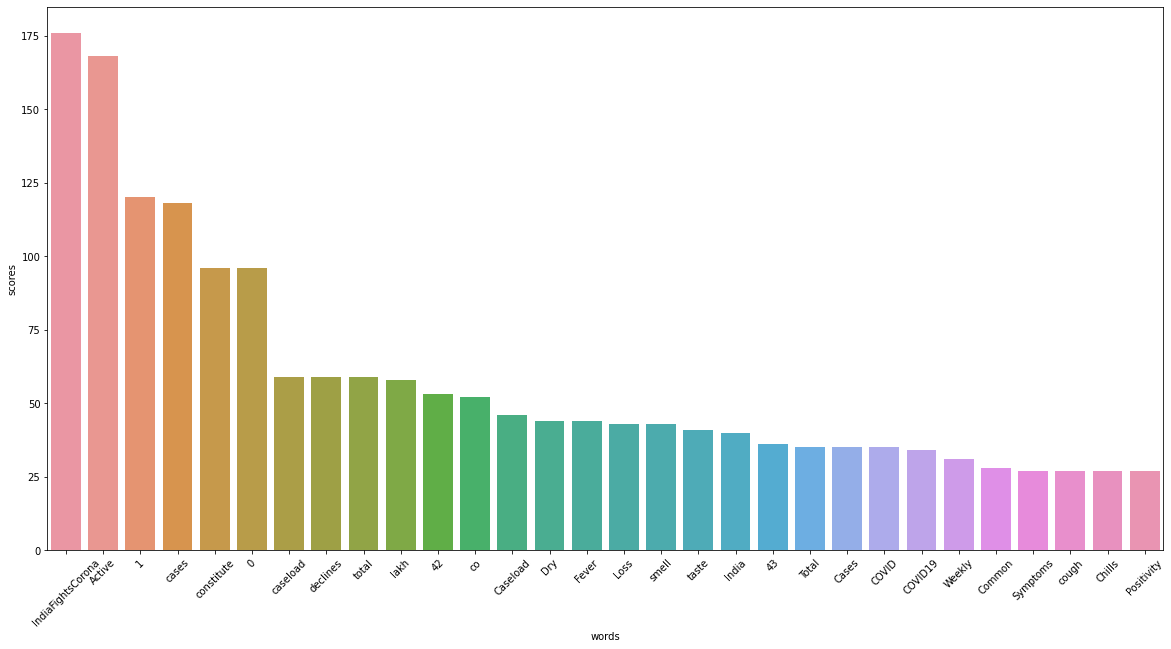

In [ ]:

plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neg_df)
plt.xticks(rotation=45)
plt.show()

# Frequently used Positive words

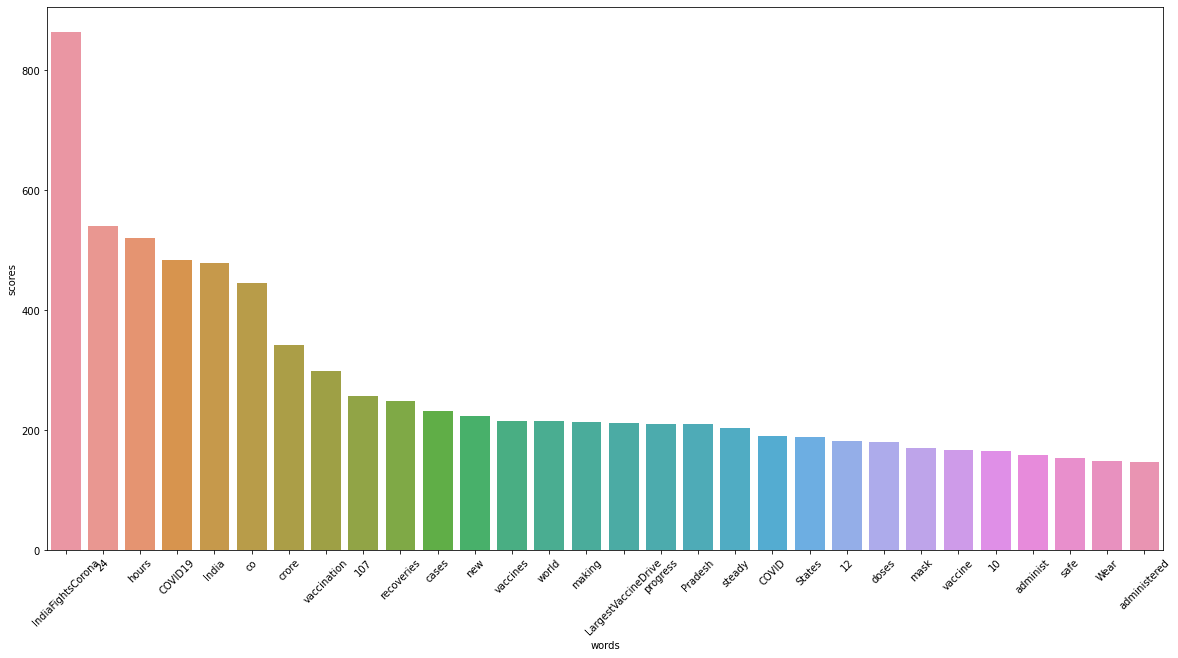

In [ ]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

# Frequently used Neutral words

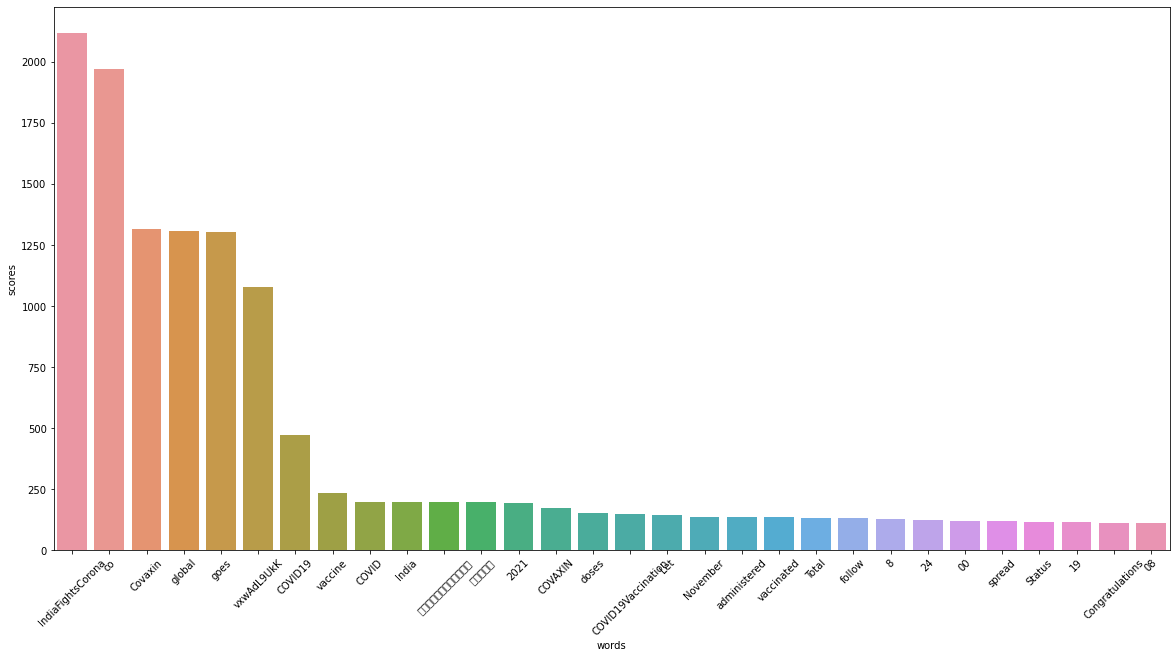

In [ ]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()


# Word Cloud

In [ ]:
from wordcloud import WordCloud


In [ ]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

# Wordcloud of Positive words

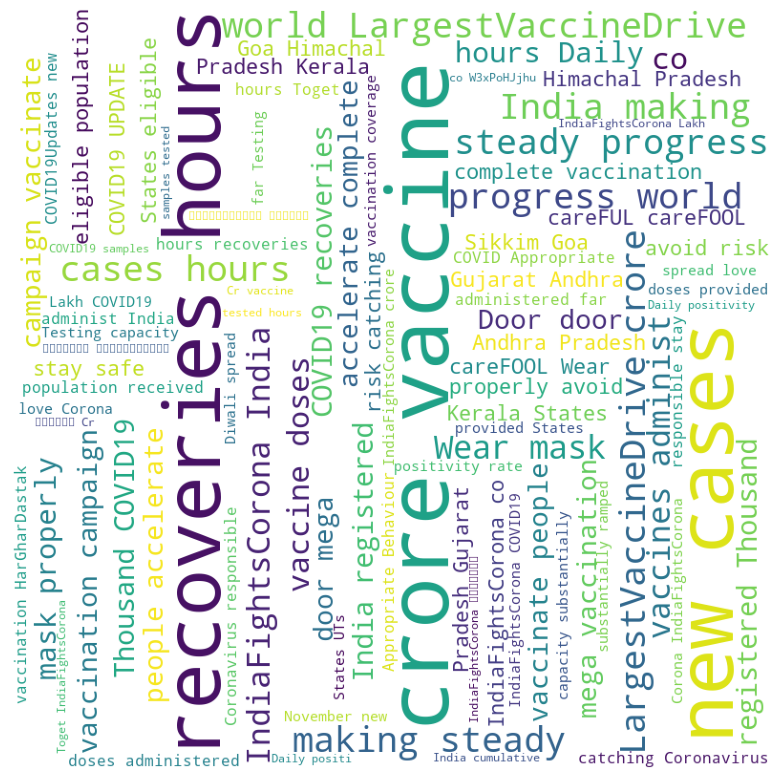

In [ ]:

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 12).generate(pos_docx) 
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
  
plt.show() 

# Wordcloud of Negative words

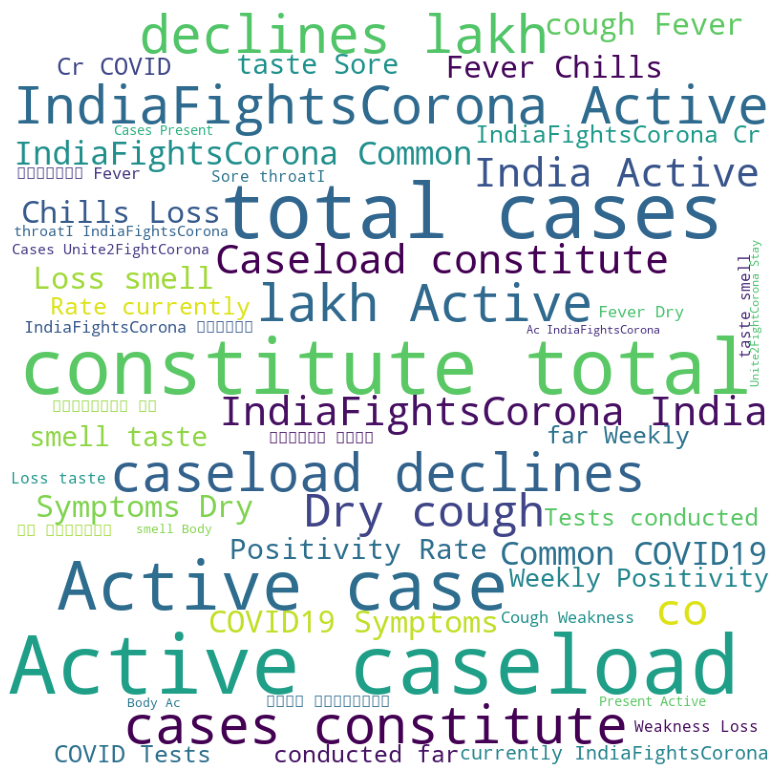

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 12).generate(neg_docx) 
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
  
plt.show() 

# Wordcloud of Neutral words

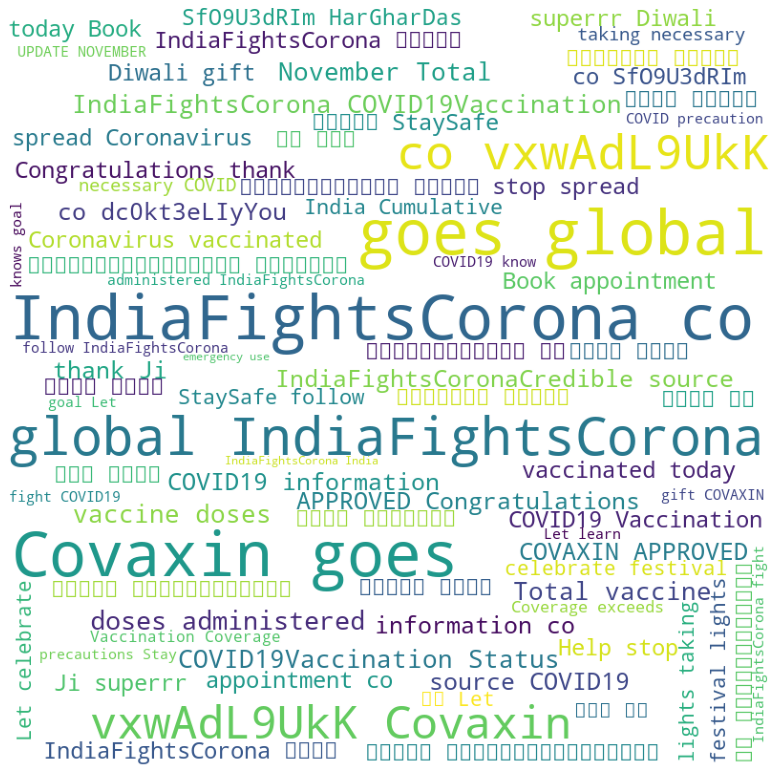

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 12).generate(neu_docx) 
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
  
plt.show() 